In [102]:
import numpy as np
from scipy.signal import argrelextrema
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [103]:
df = pd.read_csv ('../data/bitcoin.csv')

df = df.drop('Volume', axis=1)

In [104]:
# Filtrando la data

df_filtrado_4 = df.loc[(df['Date'] >= '2019-11-22') & (df['Date'] <= '2020-01-14')]

In [105]:
df_filtrado_4

,Date,Adj Close
1892,2019-11-22,7296.577637
1893,2019-11-23,7397.796875
1894,2019-11-24,7047.916992
1895,2019-11-25,7146.133789
1896,2019-11-26,7218.371094
1897,2019-11-27,7531.663574
1898,2019-11-28,7463.105957
1899,2019-11-29,7761.243652
1900,2019-11-30,7569.629883
1901,2019-12-01,7424.292480


Mínimos locales filtrados:
            Date    Adj Close
1894  2019-11-24  7047.916992
1917  2019-12-17  6640.515137

Máximos locales filtrados:
            Date    Adj Close
1893  2019-11-23  7397.796875
1897  2019-11-27  7531.663574
1899  2019-11-29  7761.243652
1938  2020-01-07  8163.692383
1941  2020-01-10  8166.554199
1943  2020-01-12  8192.494141


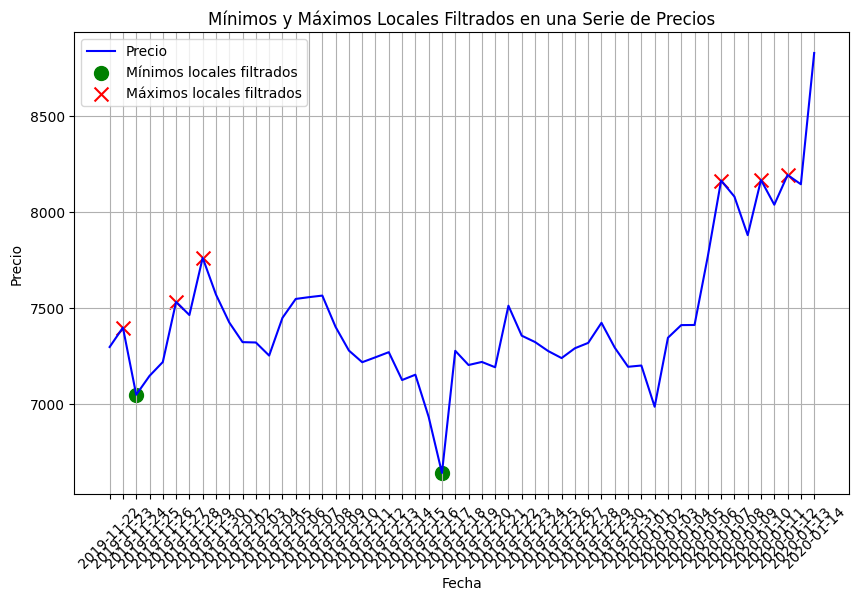

In [106]:

def find_filtered_local_extrema(df, column_name):
    """
    Encuentra los índices de los mínimos y máximos locales en una columna de un DataFrame,
    asegurándose de que cada mínimo es menor que todos los valores anteriores y cada máximo es mayor que todos los valores anteriores.

    Args:
    - df (DataFrame): DataFrame que contiene la serie de precios.
    - column_name (str): El nombre de la columna en la que se buscan los extremos locales.

    Returns:
    - np.array, np.array: Índices de los mínimos locales filtrados y máximos locales filtrados.
    """
    # Convertir la columna a un array de Numpy
    values = df[column_name].values
    
    # Encontrar índices de mínimos locales
    local_min_indices = argrelextrema(values, np.less)[0]
    
    # Encontrar índices de máximos locales
    local_max_indices = argrelextrema(values, np.greater)[0]
    
    # Filtrar mínimos locales
    filtered_min_indices = []
    current_min = np.inf  # Inicialmente, cualquier número será menor que infinito
    
    for index in local_min_indices:
        if values[index] < current_min:
            filtered_min_indices.append(index)
            current_min = values[index]
    
    # Filtrar máximos locales
    filtered_max_indices = []
    current_max = -np.inf  # Inicialmente, cualquier número será mayor que -infinito
    
    for index in local_max_indices:
        if values[index] > current_max:
            filtered_max_indices.append(index)
            current_max = values[index]
    
    return np.array(filtered_min_indices), np.array(filtered_max_indices)

# Encuentra los mínimos y máximos locales filtrados
filtered_min_indices, filtered_max_indices = find_filtered_local_extrema(df_filtrado_4, 'Adj Close')

# Crear DataFrames para los mínimos y máximos locales filtrados
df_min_filtered = df_filtrado_4.iloc[filtered_min_indices]
df_max_filtered = df_filtrado_4.iloc[filtered_max_indices]

# Mostrar los DataFrames de mínimos y máximos locales filtrados
print("Mínimos locales filtrados:")
print(df_min_filtered)
print("\nMáximos locales filtrados:")
print(df_max_filtered)

def plot_local_minima_maxima(df, df_min, df_max):
    """
    Función para graficar mínimos y máximos locales en una serie de precios.

    Args:
    - df (DataFrame): DataFrame que contiene la serie de precios con columnas 'Date' y 'Adj Close'.
    - df_min (DataFrame): DataFrame que contiene los mínimos locales.
    - df_max (DataFrame): DataFrame que contiene los máximos locales.
    """
    # Graficar los datos y marcar los mínimos y máximos locales
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Adj Close'], label='Precio', color='blue')
    
    # Marcar los mínimos locales
    plt.scatter(df_min['Date'], df_min['Adj Close'], color='green', label='Mínimos locales filtrados', s=100, marker='o')
    
    # Marcar los máximos locales
    plt.scatter(df_max['Date'], df_max['Adj Close'], color='red', label='Máximos locales filtrados', s=100, marker='x')
    
    # Configurar etiquetas y título del gráfico
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Mínimos y Máximos Locales Filtrados en una Serie de Precios')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Llama a la función plot_local_minima_maxima con tu DataFrame y los DataFrames de mínimos y máximos locales filtrados
plot_local_minima_maxima(df_filtrado_4, df_min_filtered, df_max_filtered)


Mínimos locales filtrados:
            Date    Adj Close
1894  2019-11-24  7047.916992
1917  2019-12-17  6640.515137

Máximos locales filtrados:
            Date    Adj Close
1893  2019-11-23  7397.796875
1897  2019-11-27  7531.663574
1899  2019-11-29  7761.243652
1938  2020-01-07  8163.692383
1941  2020-01-10  8166.554199
1943  2020-01-12  8192.494141


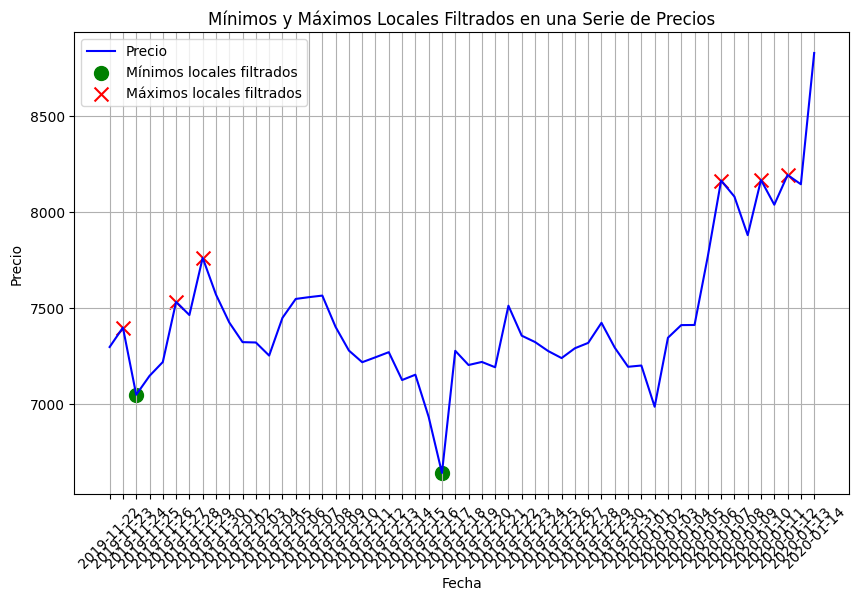

Conteo de valores por encima de cada máximo local:
Máximo local en índice 1 (2019-11-23): 23 valores por encima
Máximo local en índice 5 (2019-11-27): 14 valores por encima
Máximo local en índice 7 (2019-11-29): 9 valores por encima
Máximo local en índice 46 (2020-01-07): 3 valores por encima
Máximo local en índice 49 (2020-01-10): 2 valores por encima
Máximo local en índice 51 (2020-01-12): 1 valores por encima


In [107]:
def find_filtered_local_extrema(df, column_name):
    """
    Encuentra los índices de los mínimos y máximos locales en una columna de un DataFrame,
    asegurándose de que cada mínimo es menor que todos los valores anteriores y cada máximo es mayor que todos los valores anteriores.

    Args:
    - df (DataFrame): DataFrame que contiene la serie de precios.
    - column_name (str): El nombre de la columna en la que se buscan los extremos locales.

    Returns:
    - np.array, np.array: Índices de los mínimos locales filtrados y máximos locales filtrados.
    """
    # Convertir la columna a un array de Numpy
    values = df[column_name].values
    
    # Encontrar índices de mínimos locales
    local_min_indices = argrelextrema(values, np.less)[0]
    
    # Encontrar índices de máximos locales
    local_max_indices = argrelextrema(values, np.greater)[0]
    
    # Filtrar mínimos locales
    filtered_min_indices = []
    current_min = np.inf  # Inicialmente, cualquier número será menor que infinito
    
    for index in local_min_indices:
        if values[index] < current_min:
            filtered_min_indices.append(index)
            current_min = values[index]
    
    # Filtrar máximos locales
    filtered_max_indices = []
    current_max = -np.inf  # Inicialmente, cualquier número será mayor que -infinito
    
    for index in local_max_indices:
        if values[index] > current_max:
            filtered_max_indices.append(index)
            current_max = values[index]
    
    return np.array(filtered_min_indices), np.array(filtered_max_indices)

# Encuentra los mínimos y máximos locales filtrados
filtered_min_indices, filtered_max_indices = find_filtered_local_extrema(df_filtrado_4, 'Adj Close')

# Crear DataFrames para los mínimos y máximos locales filtrados
df_min_filtered = df_filtrado_4.iloc[filtered_min_indices]
df_max_filtered = df_filtrado_4.iloc[filtered_max_indices]

# Mostrar los DataFrames de mínimos y máximos locales filtrados
print("Mínimos locales filtrados:")
print(df_min_filtered)
print("\nMáximos locales filtrados:")
print(df_max_filtered)

def plot_local_minima_maxima(df, df_min, df_max):
    """
    Función para graficar mínimos y máximos locales en una serie de precios.

    Args:
    - df (DataFrame): DataFrame que contiene la serie de precios con columnas 'Date' y 'Adj Close'.
    - df_min (DataFrame): DataFrame que contiene los mínimos locales.
    - df_max (DataFrame): DataFrame que contiene los máximos locales.
    """
    # Graficar los datos y marcar los mínimos y máximos locales
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Adj Close'], label='Precio', color='blue')
    
    # Marcar los mínimos locales
    plt.scatter(df_min['Date'], df_min['Adj Close'], color='green', label='Mínimos locales filtrados', s=100, marker='o')
    
    # Marcar los máximos locales
    plt.scatter(df_max['Date'], df_max['Adj Close'], color='red', label='Máximos locales filtrados', s=100, marker='x')
    
    # Configurar etiquetas y título del gráfico
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Mínimos y Máximos Locales Filtrados en una Serie de Precios')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Llama a la función plot_local_minima_maxima con tu DataFrame y los DataFrames de mínimos y máximos locales filtrados
plot_local_minima_maxima(df_filtrado_4, df_min_filtered, df_max_filtered)

def count_values_above_max_indices(df, column_name, max_indices):
    """
    Cuenta cuántos valores en la columna están por encima de cada valor en los índices máximos locales.

    Args:
    - df (DataFrame): DataFrame que contiene la serie de precios.
    - column_name (str): El nombre de la columna a analizar.
    - max_indices (np.array): Índices de los máximos locales.

    Returns:
    - list: Lista con el conteo de valores por encima de cada máximo local.
    """
    values = df[column_name].values
    count_above_max = []
    
    for index in max_indices:
        count = np.sum(values > values[index])
        count_above_max.append(count)
    
    return count_above_max

# Cuenta los valores por encima de cada máximo local
counts_above_max = count_values_above_max_indices(df_filtrado_4, 'Adj Close', filtered_max_indices)

# Mostrar los resultados
print("Conteo de valores por encima de cada máximo local:")
for i, count in enumerate(counts_above_max):
    print(f"Máximo local en índice {filtered_max_indices[i]} ({df_filtrado_4.iloc[filtered_max_indices[i]]['Date']}): {count} valores por encima")


In [108]:
def count_values_above_max_indices(df, column_name, max_indices, days_after_max=7):
    """
    Cuenta cuántos valores en la columna están por encima de cada valor en los índices máximos locales y la cantidad de días por debajo del valor máximo en los siguientes días especificados.

    Args:
    - df (DataFrame): DataFrame que contiene la serie de precios.
    - column_name (str): El nombre de la columna a analizar.
    - max_indices (np.array): Índices de los máximos locales.
    - days_after_max (int): Número de días después de cada máximo local para considerar.

    Returns:
    - list, list: Dos listas, una con el conteo de valores por encima de cada máximo local en los días especificados
                 y otra con la cantidad de días por debajo del valor máximo en los días especificados.
    """
    values = df[column_name].values
    count_above_max = []
    days_below_max = []

    for index in max_indices:
        count = np.sum(values[index:index + days_after_max] > values[index])
        count_above_max.append(count)
        days = np.sum(values[index+1:index + days_after_max] < values[index])
        days_below_max.append(days)

    return count_above_max, days_below_max

# Cuenta los valores por encima de cada máximo local y la cantidad de días por debajo del valor máximo en los siguientes 7 y 15 días
counts_above_max_7, days_below_max_7 = count_values_above_max_indices(df_filtrado_4, 'Adj Close', filtered_max_indices, days_after_max=7)
counts_above_max_15, days_below_max_15 = count_values_above_max_indices(df_filtrado_4, 'Adj Close', filtered_max_indices, days_after_max=15)
counts_above_max_30, days_below_max_30 = count_values_above_max_indices(df_filtrado_4, 'Adj Close', filtered_max_indices, days_after_max=30)
counts_above_max_45, days_below_max_45 = count_values_above_max_indices(df_filtrado_4, 'Adj Close', filtered_max_indices, days_after_max=45)
# Mostrar los resultados


print("Conteo de valores por encima de cada máximo local y la cantidad de días por debajo del valor máximo en los siguientes 7 días:")
for i, (count, days) in enumerate(zip(counts_above_max_7, days_below_max_7)):
    if days >= 7 * 0.7:
        print(f"Máximo local en índice {filtered_max_indices[i]} ({df_filtrado_4.iloc[filtered_max_indices[i]]['Date']}): {count} valores por encima, {days} días por debajo del valor máximo")

print("\nConteo de valores por encima de cada máximo local y la cantidad de días por debajo del valor máximo en los siguientes 15 días:")
for i, (count, days) in enumerate(zip(counts_above_max_15, days_below_max_15)):
    if days >= 15 * 0.7:
        print(f"Máximo local en índice {filtered_max_indices[i]} ({df_filtrado_4.iloc[filtered_max_indices[i]]['Date']}): {count} valores por encima, {days} días por debajo del valor máximo")

print("\nConteo de valores por encima de cada máximo local y la cantidad de días por debajo del valor máximo en los siguientes 30 días:")
for i, (count, days) in enumerate(zip(counts_above_max_30, days_below_max_30)):
    if days >= 30 * 0.7:
        print(f"Máximo local en índice {filtered_max_indices[i]} ({df_filtrado_4.iloc[filtered_max_indices[i]]['Date']}): {count} valores por encima, {days} días por debajo del valor máximo")


print("\nConteo de valores por encima de cada máximo local y la cantidad de días por debajo del valor máximo en los siguientes 45 días:")
for i, (count, days) in enumerate(zip(counts_above_max_45, days_below_max_45)):
    if days >= 45 * 0.7:
        print(f"Máximo local en índice {filtered_max_indices[i]} ({df_filtrado_4.iloc[filtered_max_indices[i]]['Date']}): {count} valores por encima, {days} días por debajo del valor máximo")



Conteo de valores por encima de cada máximo local y la cantidad de días por debajo del valor máximo en los siguientes 7 días:
Máximo local en índice 7 (2019-11-29): 0 valores por encima, 6 días por debajo del valor máximo

Conteo de valores por encima de cada máximo local y la cantidad de días por debajo del valor máximo en los siguientes 15 días:
Máximo local en índice 7 (2019-11-29): 0 valores por encima, 14 días por debajo del valor máximo

Conteo de valores por encima de cada máximo local y la cantidad de días por debajo del valor máximo en los siguientes 30 días:
Máximo local en índice 5 (2019-11-27): 5 valores por encima, 24 días por debajo del valor máximo
Máximo local en índice 7 (2019-11-29): 0 valores por encima, 29 días por debajo del valor máximo

Conteo de valores por encima de cada máximo local y la cantidad de días por debajo del valor máximo en los siguientes 45 días:
Máximo local en índice 5 (2019-11-27): 10 valores por encima, 34 días por debajo del valor máximo
Máxim

In [109]:
fecha_buscar = pd.to_datetime('2019-11-24')
print (fecha_buscar)

2019-11-24 00:00:00


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Coordenadas de la primera fecha y punto específico en tu DataFrame
x_point1 = pd.to_datetime('2019-11-24')  # Convertir la fecha a formato de fecha y hora
y_point1 = df_filtrado_4.loc[df_filtrado_4['Date'] == x_point1, 'Adj Close'].iloc[0]

# Coordenadas de la segunda fecha y punto específico en tu DataFrame
x_point2 = pd.to_datetime('2019-11-27')  # Convertir la fecha a formato de fecha y hora
y_point2 = df_filtrado_4.loc[df_filtrado_4['Date'] == x_point2, 'Adj Close'].iloc[0]

# Obtener las coordenadas de los extremos del gráfico
xmin = df_filtrado_4['Date'].iloc[0]
xmax = df_filtrado_4['Date'].iloc[-1]
ymin = df_filtrado_4['Adj Close'].min()
ymax = df_filtrado_4['Adj Close'].max()

# Graficar los datos y las líneas rectas
plt.figure(figsize=(10, 6))
plt.plot(df_filtrado_4['Date'], df_filtrado_4['Adj Close'], label='Precio')
plt.scatter([x_point1, x_point2], [y_point1, y_point2], color='red', label='Puntos específicos', s=100, marker='o')
plt.plot([xmin, xmax], [y_point1, y_point1], color='green', linestyle='--', label='Línea recta 1')
plt.plot([xmin, xmax], [y_point2, y_point2], color='blue', linestyle='--', label='Línea recta 2')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Líneas Rectas desde Puntos Específicos')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(ymin, ymax)  # Ajustar el límite y para que las líneas rectas sean visibles en el gráfico completo
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Formatear las etiquetas del eje x como fechas
plt.show()


IndexError: single positional indexer is out-of-bounds

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Coordenadas de la primera fecha y punto específico en tu DataFrame
x_point1 = pd.to_datetime('2019-11-24')  # Convertir la fecha a formato de fecha y hora
y_point1 = df_filtrado_4.loc[df_filtrado_4['Date'] == x_point1, 'Adj Close'].iloc[0]

# Coordenadas de la segunda fecha y punto específico en tu DataFrame
x_point2 = pd.to_datetime('2019-11-27')  # Convertir la fecha a formato de fecha y hora
y_point2 = df_filtrado_4.loc[df_filtrado_4['Date'] == x_point2, 'Adj Close'].iloc[0]

# Obtener las coordenadas de los extremos del gráfico
xmin = df_filtrado_4['Date'].iloc[0]
xmax = df_filtrado_4['Date'].iloc[-1]
ymin = df_filtrado_4['Adj Close'].min()
ymax = df_filtrado_4['Adj Close'].max()

# Graficar los datos y las líneas rectas
plt.figure(figsize=(10, 6))
plt.plot(df_filtrado_4['Date'], df_filtrado_4['Adj Close'], label='Precio')
plt.scatter([x_point1, x_point2], [y_point1, y_point2], color='red', label='Puntos específicos', s=100, marker='o')
plt.plot([xmin, xmax], [y_point1, y_point1], color='green', linestyle='--', label='Línea recta 1')
plt.plot([xmin, xmax], [y_point2, y_point2], color='blue', linestyle='--', label='Línea recta 2')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Líneas Rectas desde Puntos Específicos')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(ymin, ymax)  # Ajustar el límite y para que las líneas rectas sean visibles en el gráfico completo
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Formatear las etiquetas del eje x como fechas
plt.show()


IndexError: single positional indexer is out-of-bounds

C:\Users\pobla\AppData\Local\Temp\ipykernel_8264\532113214.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_4['Date'] = pd.to_datetime(df_filtrado_4['Date'])


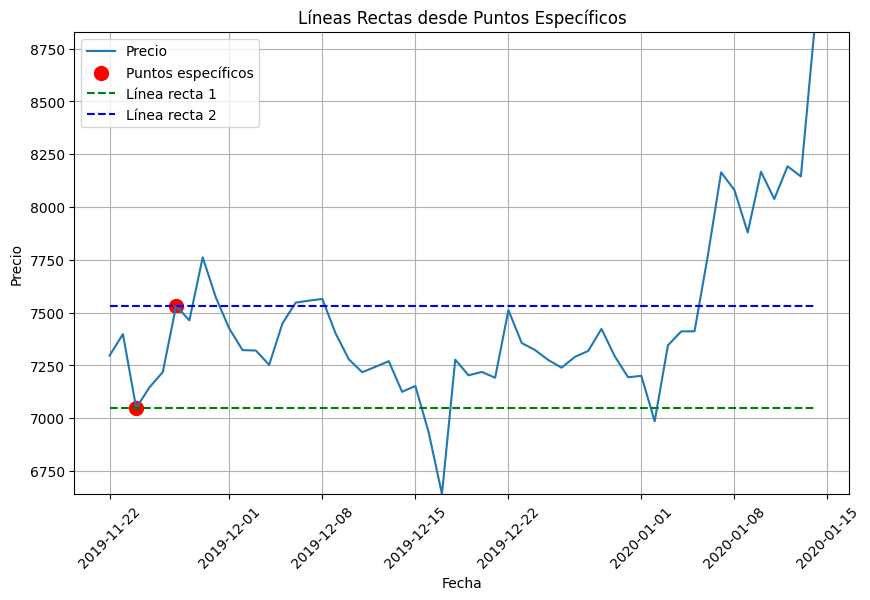

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Asegúrate de que la columna 'Date' esté en formato datetime
df_filtrado_4['Date'] = pd.to_datetime(df_filtrado_4['Date'])

# Verifica si las fechas están presentes en el DataFrame
fecha1 = pd.to_datetime('2019-11-24')
fecha2 = pd.to_datetime('2019-11-27')

if fecha1 in df_filtrado_4['Date'].values and fecha2 in df_filtrado_4['Date'].values:
    # Coordenadas de la primera fecha y punto específico en tu DataFrame
    y_point1 = df_filtrado_4.loc[df_filtrado_4['Date'] == fecha1, 'Adj Close'].iloc[0]

    # Coordenadas de la segunda fecha y punto específico en tu DataFrame
    y_point2 = df_filtrado_4.loc[df_filtrado_4['Date'] == fecha2, 'Adj Close'].iloc[0]

    # Obtener las coordenadas de los extremos del gráfico
    xmin = df_filtrado_4['Date'].iloc[0]
    xmax = df_filtrado_4['Date'].iloc[-1]
    ymin = df_filtrado_4['Adj Close'].min()
    ymax = df_filtrado_4['Adj Close'].max()

    # Graficar los datos y las líneas rectas
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtrado_4['Date'], df_filtrado_4['Adj Close'], label='Precio')
    plt.scatter([fecha1, fecha2], [y_point1, y_point2], color='red', label='Puntos específicos', s=100, marker='o')
    plt.plot([xmin, xmax], [y_point1, y_point1], color='green', linestyle='--', label='Línea recta 1')
    plt.plot([xmin, xmax], [y_point2, y_point2], color='blue', linestyle='--', label='Línea recta 2')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Líneas Rectas desde Puntos Específicos')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.ylim(ymin, ymax)  # Ajustar el límite y para que las líneas rectas sean visibles en el gráfico completo
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Formatear las etiquetas del eje x como fechas
    plt.show()
else:
    print("Una o ambas fechas no están presentes en el DataFrame.")


 6640.515137  7047.916992  // 7531.663574   7761.243652           
